In [1]:
# set up 
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim
seed = list(range(1,51))
seed_data = 10

import os

print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/spa/seq-posterior-approx-w-nf-dev/mv_gaussian')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

import random

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian/low_dim_w_summary_stats
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian


In [ ]:
# set width to full screen 
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# set style 
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1


# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [3]:
seed_max = 10
nbr_rounds = 10

## Present results 

Set functions to load results 

In [4]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

# this func. is used to read both the posteiro sames and the data samples 
def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")


Load results 

In [5]:
smcabc_res = np.zeros((8, seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/results/abcsmc_' + id_job + '.txt'
    smcabc_res[:,i] = read_res_file(p)

In [6]:
snl_res = np.zeros((2+nbr_rounds,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/results/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [7]:
snpe_c_res = np.zeros((2+nbr_rounds,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/results/snpec_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)


In [8]:
snre_b_res = np.zeros((2+nbr_rounds,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/results/snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

In [9]:
spa_flow_res = np.zeros((2+nbr_rounds, seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/results/spa_flow_' + id_job + '.txt'
    spa_flow_res[:,i] = read_res_file(p)

Runtime (training) (sec)

In [10]:
print("SMC-ABC: " + str(smcabc_res[0,:].mean().round(4)))
print("SNL: " + str(snl_res[0,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[0,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[0,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[0,:].mean().round(4)))

SMC-ABC: 1.5425
SNL: 13212.6433
SNPE-C: 1853.5006
SNRE-B: 3412.5526
SPA-Flow: 2244.0742


Runtime (inference, i.e. gen. 1000 samples from the res. posterior) (sec)

In [11]:
print("SMC-ABC: " + str(smcabc_res[1,:].mean().round(4)))
print("SNL: " + str(snl_res[1,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[1,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[1,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[1,:].mean().round(4)))

SMC-ABC: 0.0006
SNL: 1824.6837
SNPE-C: 0.0288
SNRE-B: 119.2746
SPA-Flow: 0.0529


KL div between res. approx. posterior and analytical posterior

In [12]:
print("SMC-ABC: " + str(smcabc_res[-1,:].mean().round(4)))
print("SNL: " + str(snl_res[-1,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[-1,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[-1,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[-1,:].mean().round(4)))

SMC-ABC: 0.0822
SNL: 0.0268
SNPE-C: 0.0232
SNRE-B: 1.0414
SPA-Flow: 0.0607


Band plot for kl div

In [13]:
x_grid_abcsmc = [2500, 5000, 7500, 10000, 100000, 1000000]
upper_q = 0.75
lower_w = 0.25


x_grid = []
x_grid.append(2500)

for i in range(nbr_rounds-1):
    x_grid.append(x_grid[i] + 2500)

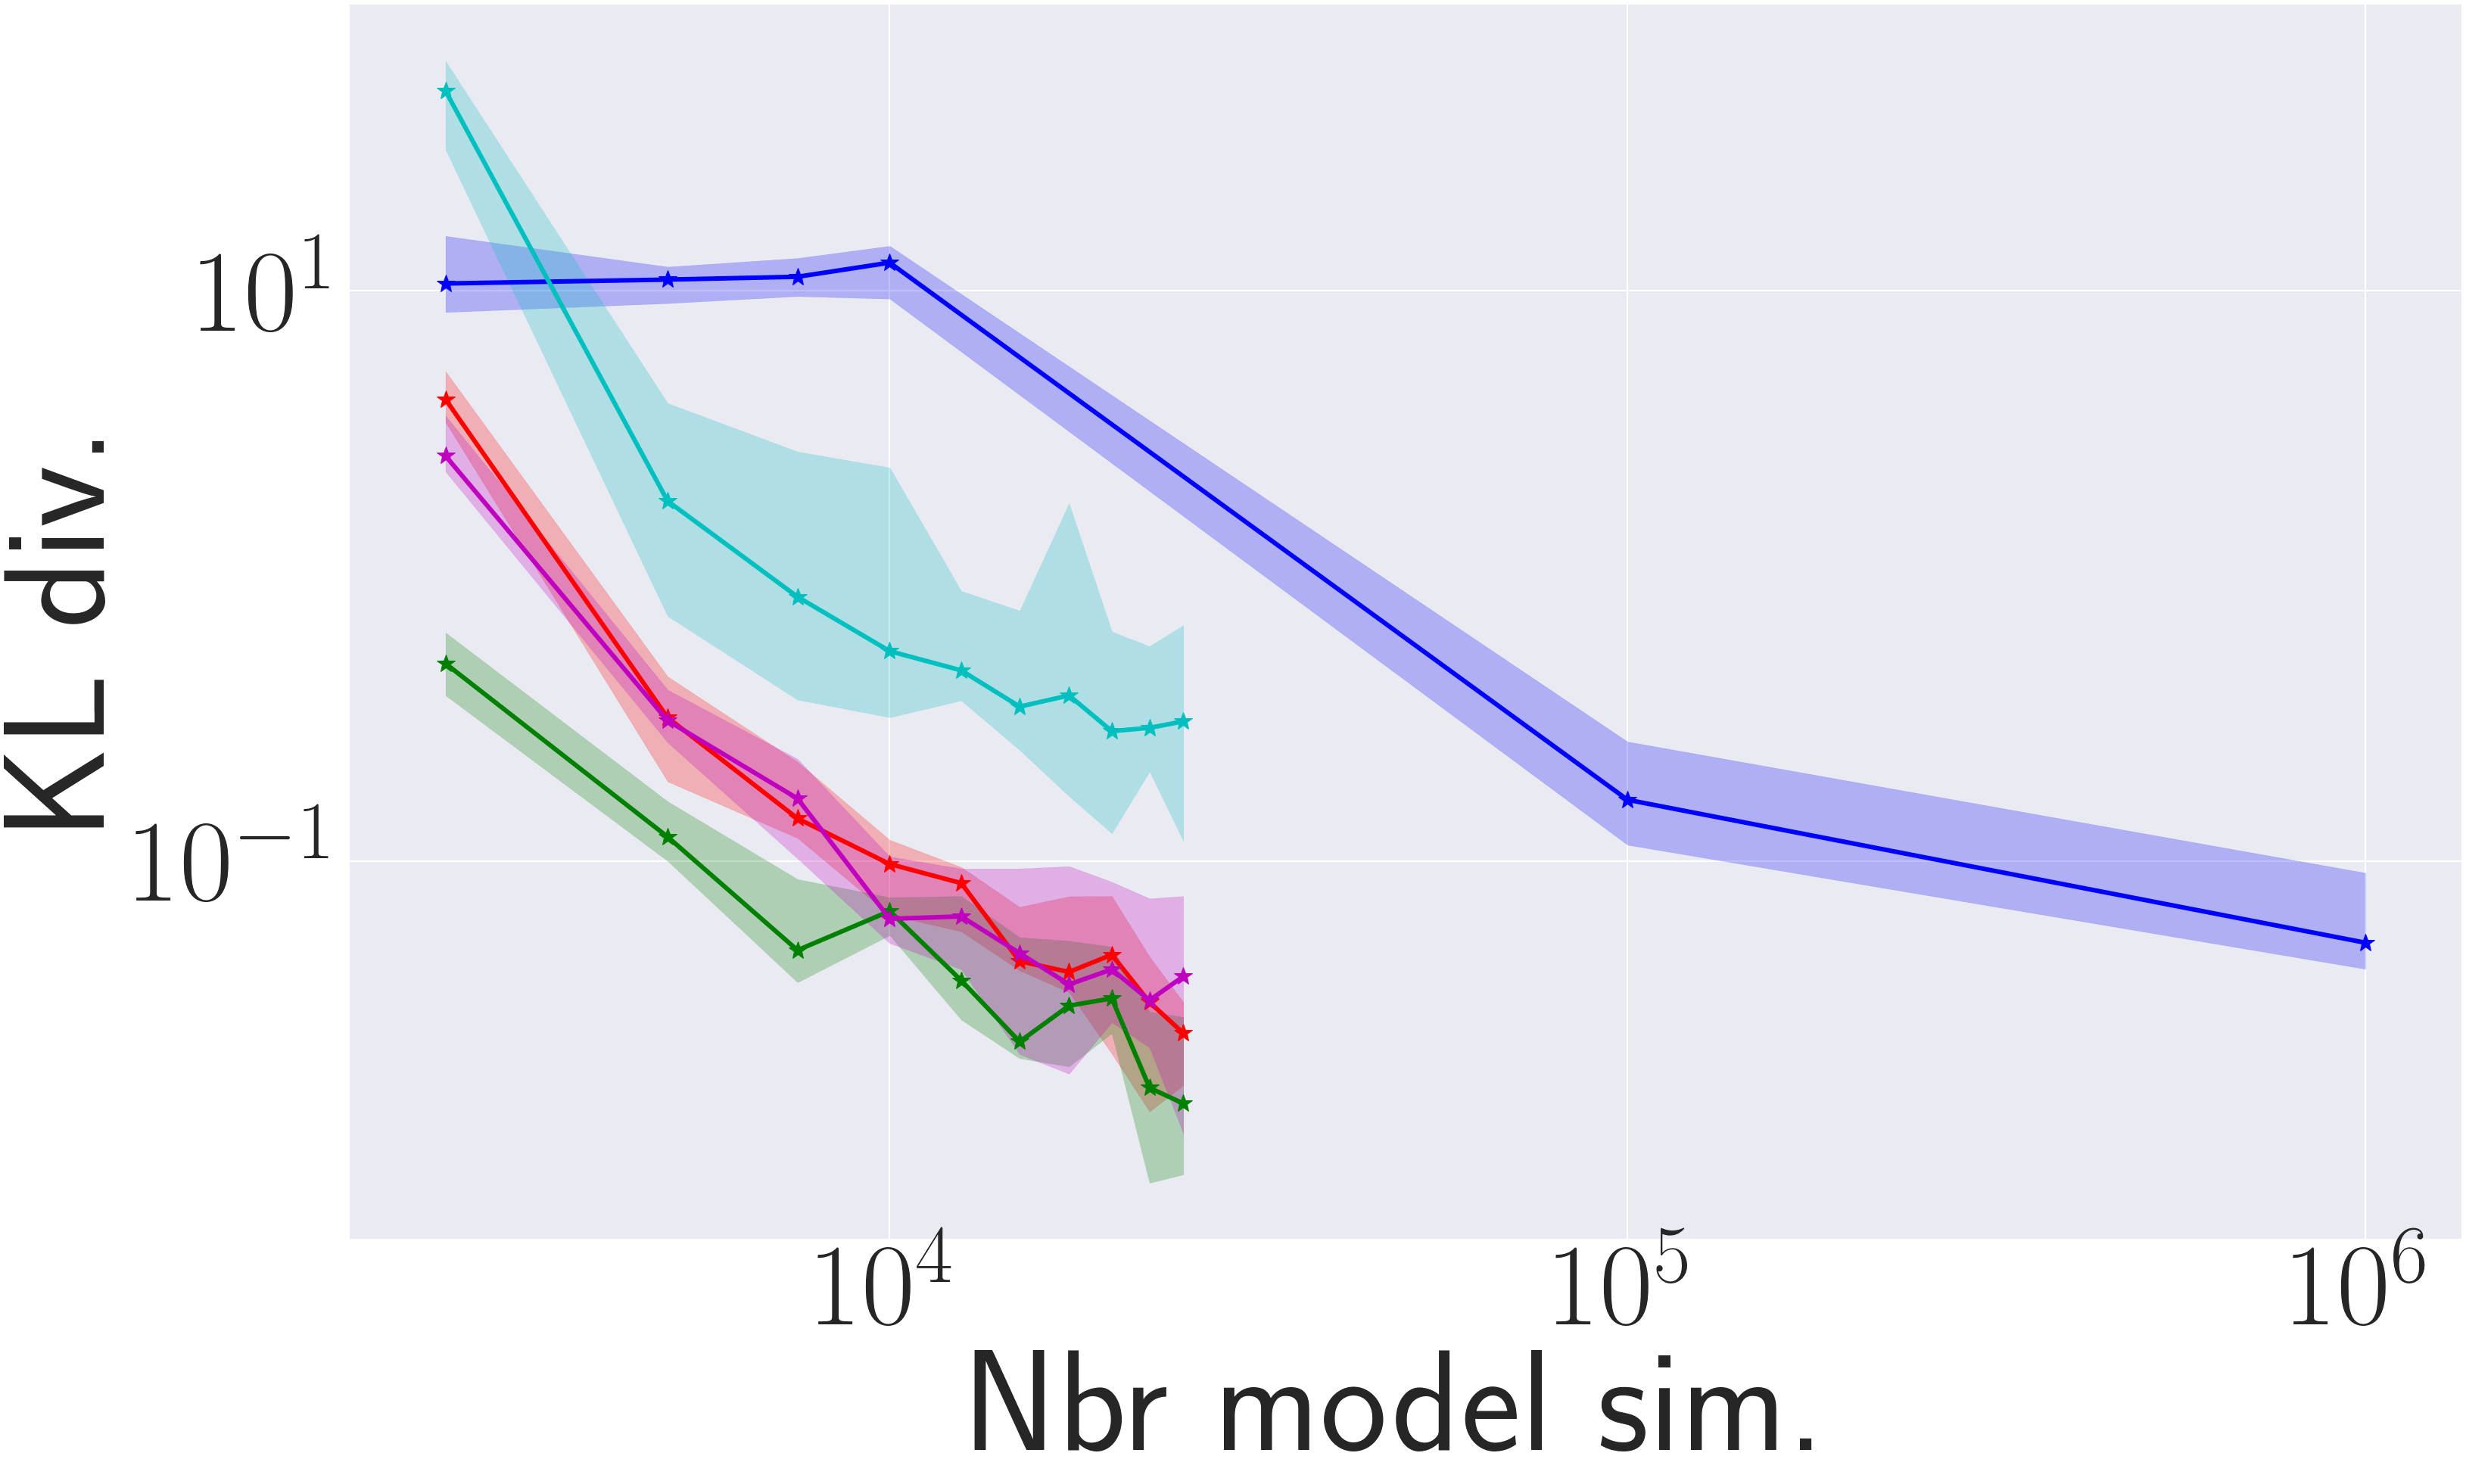

In [14]:
fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x_grid_abcsmc, np.median(smcabc_res[2:,:],axis = 1), color = "b",
         label='SMC-ABC',linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid_abcsmc, 
                np.quantile(smcabc_res[2:,:], lower_w, axis = 1), 
                np.quantile(smcabc_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "b")


ax.loglog(x_grid, np.median(snl_res[2:,:],axis = 1), color = "r",
         label='SNL', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snl_res[2:,:], lower_w, axis = 1), 
                np.quantile(snl_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "r")


ax.loglog(x_grid, np.median(snpe_c_res[2:,:],axis = 1), color = "g",
         label='SNPE-C', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snpe_c_res[2:,:], lower_w, axis = 1), 
                np.quantile(snpe_c_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "g")


ax.loglog(x_grid, np.median(snre_b_res[2:,:],axis = 1), color = "c",
         label='SNRE-B', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snre_b_res[2:,:], lower_w, axis = 1), 
                np.quantile(snre_b_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "c")

ax.loglog(x_grid, np.median(spa_flow_res[2:,:],axis = 1), color = "m",
         label='SNPLA', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(spa_flow_res[2:,:], lower_w, axis = 1), 
                np.quantile(spa_flow_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "m")

ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=155)
ax.tick_params(axis='both', which='minor', labelsize=150)
#ax.legend(prop={'size': 50})
ax.set_ylabel("KL div.", fontsize=190)
ax.set_xlabel("Nbr model sim.", fontsize=190)
plt.savefig("./low_dim_w_summary_stats/fig/mv_gauss_summary_stats_kl_band_plot.pdf", 
           bbox_inches = 'tight')

Nbr cases with NaNs

In [15]:
print("SMC-ABC: " + str(sum(np.isnan(smcabc_res[2,:]))))
print("SNL: " + str(sum(np.isnan(snl_res[2,:]))))
print("SNPE-C: " + str(sum(np.isnan(snpe_c_res[2,:]))))
print("SNRE-B: " + str(sum(np.isnan(snre_b_res[2,:]))))
print("SPA-Flow: " + str(sum(np.isnan(spa_flow_res[2,:]))))


SMC-ABC: 0
SNL: 0
SNPE-C: 0
SNRE-B: 0
SPA-Flow: 0


## Plotting - posterior

In [16]:
iter = 10

In [17]:
analytical_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/post_samples_analytical_' + id_job + '.csv'
    analytical_post.append(read_posterior_samples(p))

In [18]:
iter_smc = 1000

smcabc_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/abcsmc_posterior_' + str(iter_smc) + \
    "_" +  id_job + '.csv'
    smcabc_post.append(read_posterior_samples(p))
  

In [19]:
smcabc_post[0].shape

(1000, 2)

In [20]:
snl_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/snl_posterior_'  + str(iter) + \
    "_" + id_job + '.csv'
    snl_post.append(read_posterior_samples(p))

In [21]:
snpe_c_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/post_samples_snpec_'  + str(iter) + \
    "_" + id_job + '.csv'
    snpe_c_post.append(read_posterior_samples(p))

In [22]:
snpr_b_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/post_samples_snre_b_'  + str(iter) + \
    "_" + id_job + '.csv'
    snpr_b_post.append(read_posterior_samples(p))

In [23]:
spa_flow_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/post_samples_spa_flow_'  + str(iter) + \
    "_" + id_job + '.csv'
    spa_flow_post.append(read_posterior_samples(p))

In [24]:
random.seed(10)

Res posterior for dataset: 9


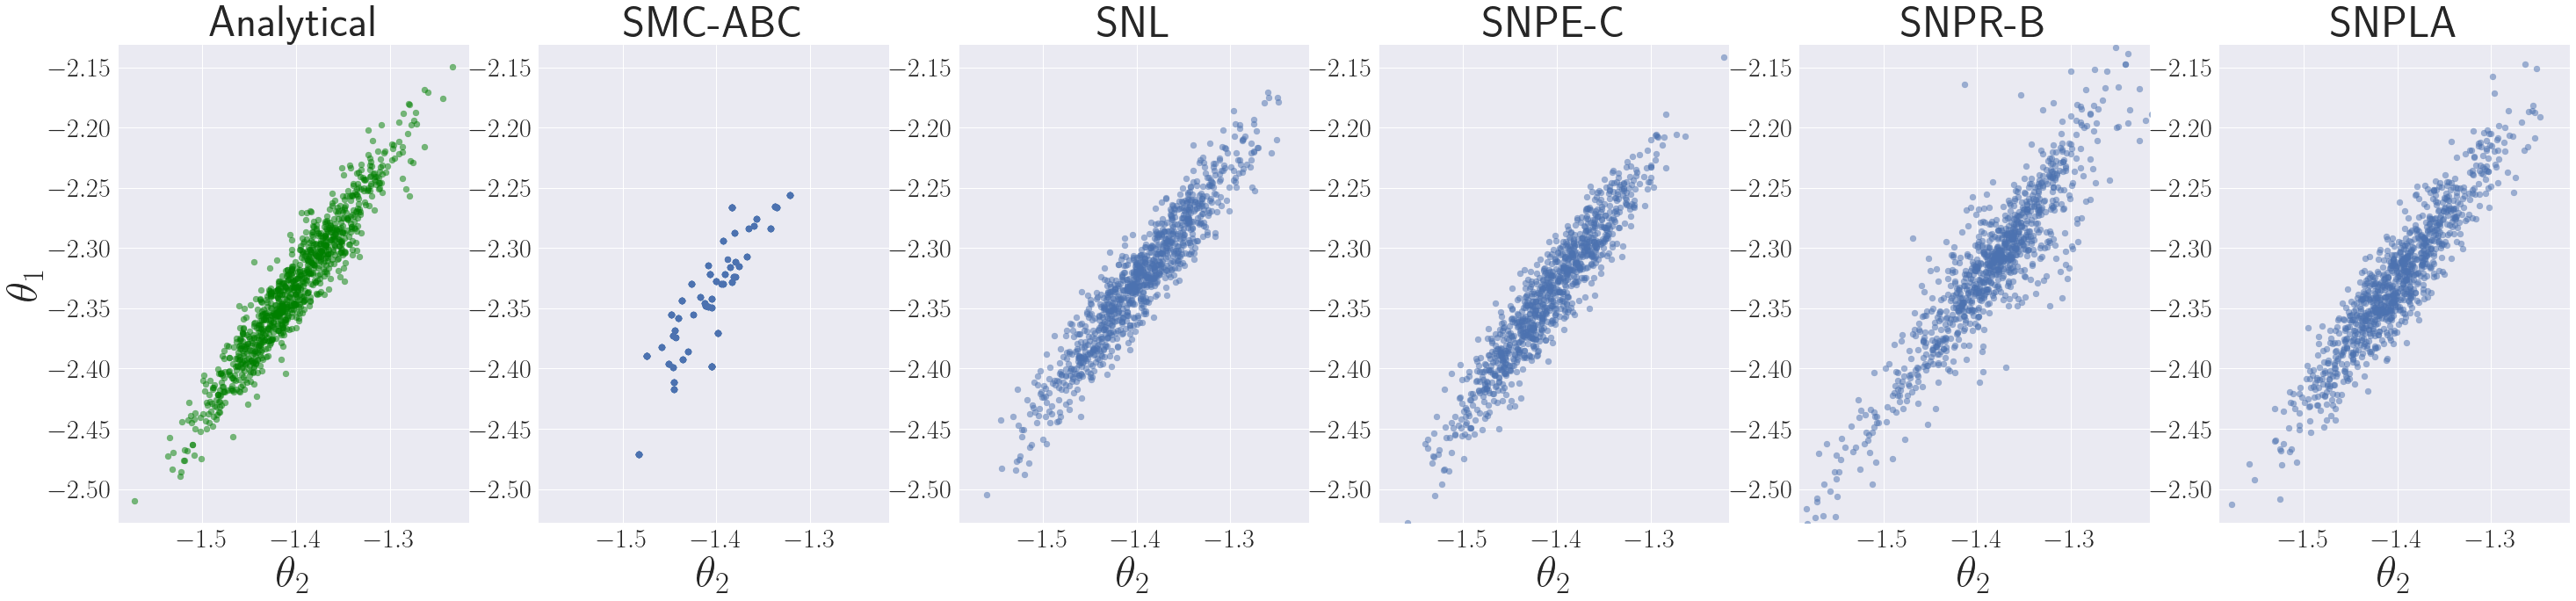

In [25]:
data_set =  random.randint(0, 9)

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2, sharex=ax1) # why arent the axis fixed
ax3 = fig.add_subplot(1, 6, 3, sharex=ax1)
ax4 = fig.add_subplot(1, 6, 4, sharex=ax1)
ax5 = fig.add_subplot(1, 6, 5, sharex=ax1)
ax6 = fig.add_subplot(1, 6, 6, sharex=ax1)

ax1.scatter(analytical_post[data_set][:,0],analytical_post[data_set][:,1],alpha = 0.5,color = "g")

ax2.scatter(smcabc_post[data_set][:,0],smcabc_post[data_set][:,1],alpha = 0.5)
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3.scatter(snl_post[data_set][:,0],snl_post[data_set][:,1],alpha = 0.5)
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.scatter(snpe_c_post[data_set][:,0],snpe_c_post[data_set][:,1],alpha = 0.5)
ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.scatter(snpr_b_post[data_set][:,0],snpr_b_post[data_set][:,1],alpha = 0.5)
ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.scatter(spa_flow_post[data_set][:,0],spa_flow_post[data_set][:,1],alpha = 0.5)
ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax1.set_title("Analytical",fontsize=50)
ax2.set_title("SMC-ABC",fontsize=50)
ax3.set_title("SNL",fontsize=50)
ax4.set_title("SNPE-C",fontsize=50)
ax5.set_title("SNPR-B",fontsize=50)
ax6.set_title("SNPLA",fontsize=50)
#plt.savefig('2d w 5 obs/true_post_training_from_target_joint_approx_posteriors_plot_1.png')


ax1.set_ylabel(r'$\theta_1$',fontsize=50)

ax1.set_xlabel(r'$\theta_2$',fontsize=50)
ax2.set_xlabel(r'$\theta_2$',fontsize=50)
ax3.set_xlabel(r'$\theta_2$',fontsize=50)
ax4.set_xlabel(r'$\theta_2$',fontsize=50)
ax5.set_xlabel(r'$\theta_2$',fontsize=50)
ax6.set_xlabel(r'$\theta_2$',fontsize=50)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='minor', labelsize=25)

ax3.tick_params(axis='both', which='major', labelsize=30)
ax3.tick_params(axis='both', which='minor', labelsize=25)

ax4.tick_params(axis='both', which='major', labelsize=30)
ax4.tick_params(axis='both', which='minor', labelsize=25)

ax5.tick_params(axis='both', which='major', labelsize=30)
ax5.tick_params(axis='both', which='minor', labelsize=25)

ax6.tick_params(axis='both', which='major', labelsize=30)
ax6.tick_params(axis='both', which='minor', labelsize=25)

print("Res posterior for dataset: " + str(data_set))

file_name_base = "./low_dim_w_summary_stats/fig/mv_gauss_summary_stats_posterior_samples"
file_name_iter_data = "_" + str(iter) + "_" + str(data_set)
plt.savefig(file_name_base + file_name_iter_data + ".pdf")

Res posterior for dataset: 9


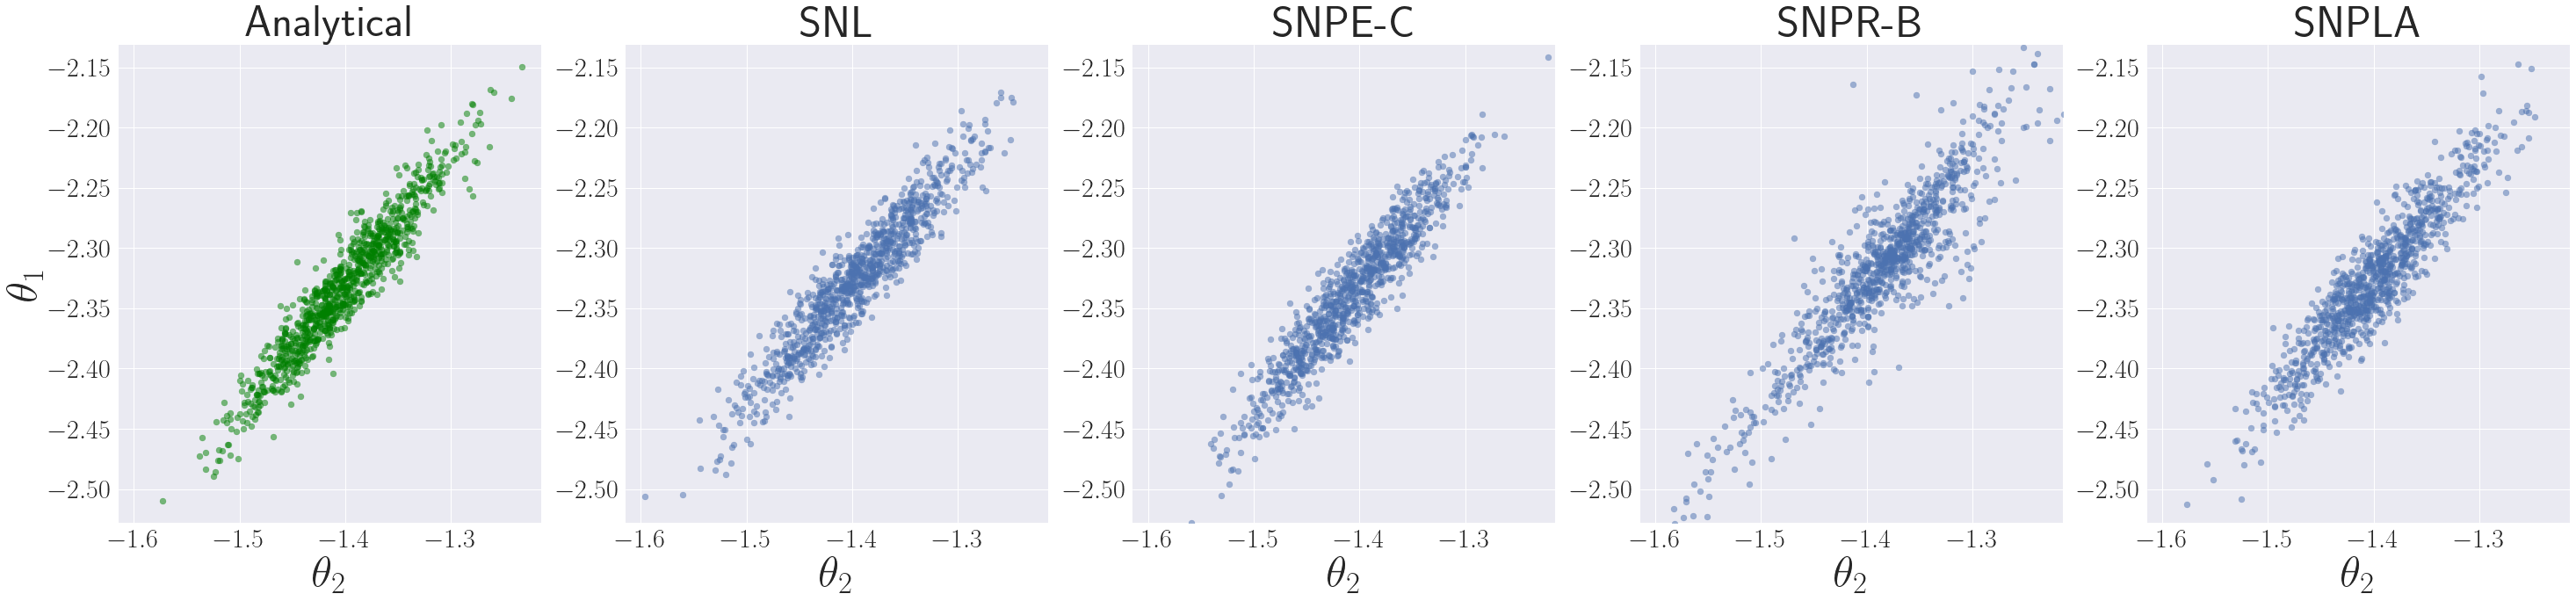

In [149]:
fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 5, 1)
ax3 = fig.add_subplot(1, 5, 2, sharex=ax1)
ax4 = fig.add_subplot(1, 5, 3, sharex=ax1)
ax5 = fig.add_subplot(1, 5, 4, sharex=ax1)
ax6 = fig.add_subplot(1, 5, 5, sharex=ax1)

ax1.scatter(analytical_post[data_set][:,0],analytical_post[data_set][:,1],alpha = 0.5,color = "g")

ax3.scatter(snl_post[data_set][:,0],snl_post[data_set][:,1],alpha = 0.5)
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.scatter(snpe_c_post[data_set][:,0],snpe_c_post[data_set][:,1],alpha = 0.5)
ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.scatter(snpr_b_post[data_set][:,0],snpr_b_post[data_set][:,1],alpha = 0.5)
ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.scatter(spa_flow_post[data_set][:,0],spa_flow_post[data_set][:,1],alpha = 0.5)
ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax1.set_title("Analytical",fontsize=50)
ax2.set_title("SMC-ABC",fontsize=50)
ax3.set_title("SNL",fontsize=50)
ax4.set_title("SNPE-C",fontsize=50)
ax5.set_title("SNPR-B",fontsize=50)
ax6.set_title("SNPLA",fontsize=50)
#plt.savefig('2d w 5 obs/true_post_training_from_target_joint_approx_posteriors_plot_1.png')


ax1.set_ylabel(r'$\theta_1$',fontsize=50)

ax1.set_xlabel(r'$\theta_2$',fontsize=50)
ax2.set_xlabel(r'$\theta_2$',fontsize=50)
ax3.set_xlabel(r'$\theta_2$',fontsize=50)
ax4.set_xlabel(r'$\theta_2$',fontsize=50)
ax5.set_xlabel(r'$\theta_2$',fontsize=50)
ax6.set_xlabel(r'$\theta_2$',fontsize=50)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax3.tick_params(axis='both', which='major', labelsize=30)
ax3.tick_params(axis='both', which='minor', labelsize=25)

ax4.tick_params(axis='both', which='major', labelsize=30)
ax4.tick_params(axis='both', which='minor', labelsize=25)

ax5.tick_params(axis='both', which='major', labelsize=30)
ax5.tick_params(axis='both', which='minor', labelsize=25)

ax6.tick_params(axis='both', which='major', labelsize=30)
ax6.tick_params(axis='both', which='minor', labelsize=25)

print("Res posterior for dataset: " + str(data_set))

file_name_base = "./low_dim_w_summary_stats/fig/mv_gauss_summary_stats_posterior_samples"
file_name_iter_data = "_" + str(iter) + "_" + str(data_set) + "_" + "wo_smcabc"
plt.savefig(file_name_base + file_name_iter_data + ".pdf")

Check like models for $\theta_{post}$

In [150]:
spa_flow_lik_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/data_recon_post_spa_flow_' + id_job + '.csv'
    spa_flow_lik_post.append(read_posterior_samples(p))

In [151]:
snl_lik_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/data_recon_post_snl_' + id_job + '.csv'
    snl_lik_post.append(read_posterior_samples(p))

In [152]:
model_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_summary_stats/data/x_summary_stats_samples_post_pred_' + id_job + '.csv'
    model_post.append(read_posterior_samples(p))

In [171]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(model_post[data_set][:,0])

In [180]:
kde.evaluate(grid_1)

array([1.38562379e-04, 8.31188640e-04, 3.74197054e-03, 1.28233147e-02,
       3.41233925e-02, 7.22886858e-02, 1.25195834e-01, 1.81909972e-01,
       2.29316738e-01, 2.67892247e-01, 3.23766124e-01, 4.39066451e-01,
       6.46187687e-01, 9.51955300e-01, 1.34144725e+00, 1.78779692e+00,
       2.25819005e+00, 2.72116470e+00, 3.15565453e+00, 3.55697651e+00,
       3.93560999e+00, 4.29681340e+00, 4.61749733e+00, 4.85701925e+00,
       4.98241830e+00, 4.97704330e+00, 4.85447519e+00, 4.66820364e+00,
       4.46879761e+00, 4.24854318e+00, 3.96230038e+00, 3.59718999e+00,
       3.19247917e+00, 2.80305482e+00, 2.45814249e+00, 2.14731858e+00,
       1.85204887e+00, 1.57845214e+00, 1.33599449e+00, 1.11030150e+00,
       8.86939236e-01, 6.82759004e-01, 5.26717156e-01, 4.18534396e-01,
       3.30089058e-01, 2.42292868e-01, 1.59497669e-01, 9.28491333e-02,
       4.68663406e-02, 1.97992270e-02])

In [179]:
ax6.get_xlim()
ax6.get_ylim()

grid_1 = np.linspace(ax6.get_xlim()[0],ax6.get_xlim()[1])

In [177]:
ax6.get_xlim()

(-1.6844916105270387, -1.1487937211990358)

In [169]:
bins1

array([-1.61963332, -1.60475556, -1.5898778 , -1.57500005, -1.56012229,
       -1.54524453, -1.53036678, -1.51548902, -1.50061127, -1.48573351,
       -1.47085575, -1.455978  , -1.44110024, -1.42622248, -1.41134473,
       -1.39646697, -1.38158921, -1.36671146, -1.3518337 , -1.33695594,
       -1.32207819, -1.30720043, -1.29232268, -1.27744492, -1.26256716,
       -1.24768941, -1.23281165, -1.21793389, -1.20305614, -1.18817838,
       -1.17330062])

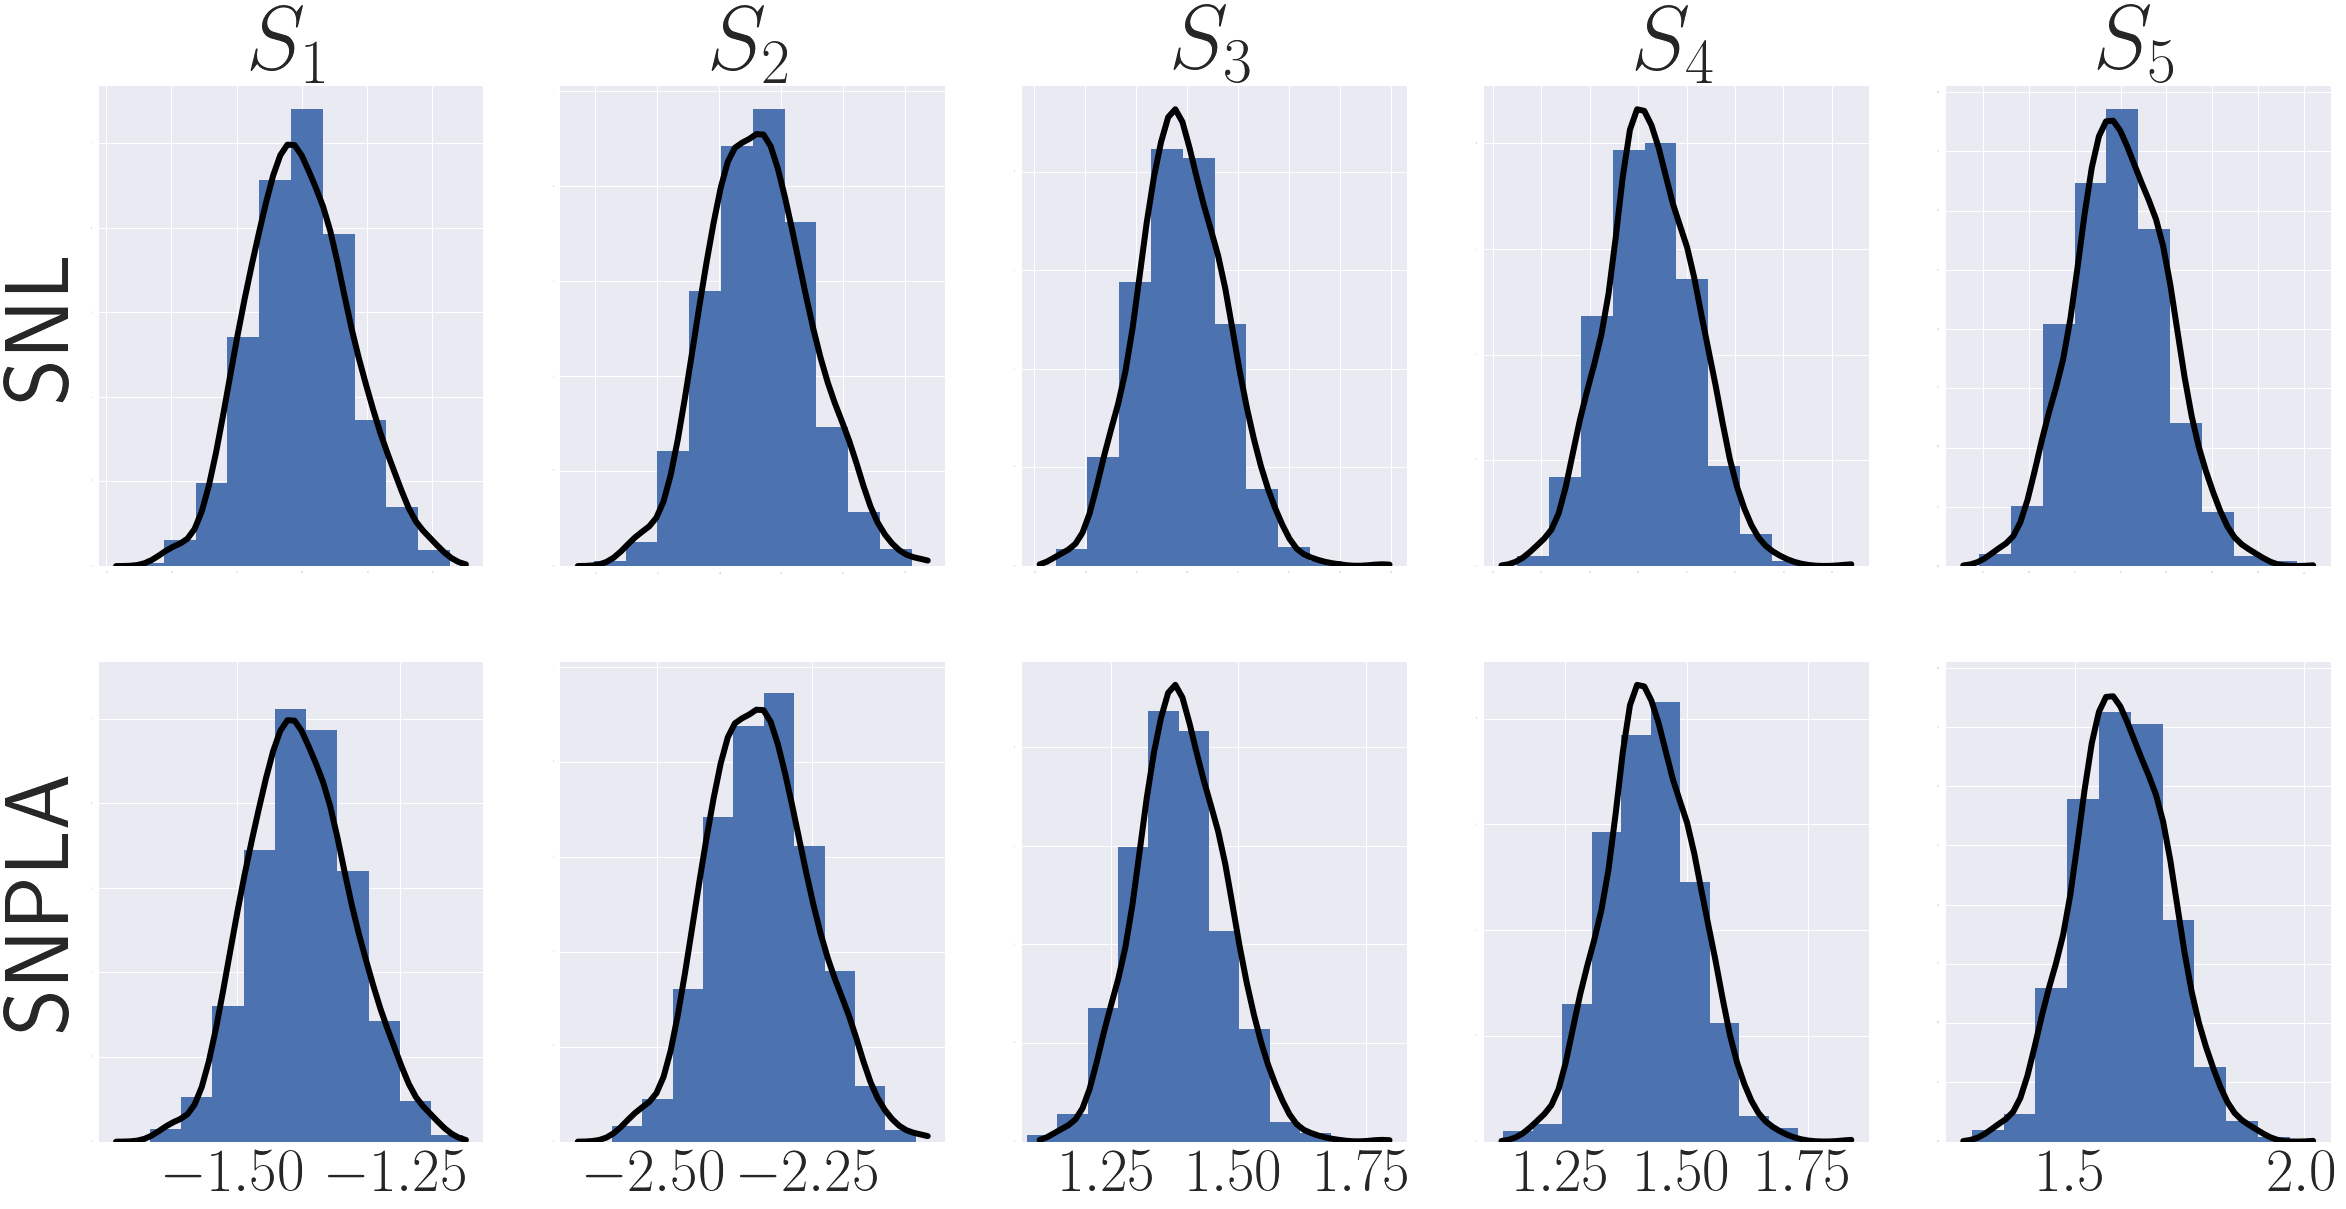

In [197]:

fig = plt.figure(figsize = (40,30))


ax1 = fig.add_subplot(3, 5, 6)
ax2 = fig.add_subplot(3, 5, 7)
ax3 = fig.add_subplot(3, 5, 8)
ax4 = fig.add_subplot(3, 5, 9)
ax5 = fig.add_subplot(3, 5, 10)

ax6 = fig.add_subplot(3, 5, 1)
ax7 = fig.add_subplot(3, 5, 2)
ax8 = fig.add_subplot(3, 5, 3)
ax9 = fig.add_subplot(3, 5, 4)
ax10 = fig.add_subplot(3, 5, 5)

# here we can use wasserstein 

# SNL
ax6.hist(snl_lik_post[data_set][:,0], density = True)

grid_1 = np.linspace(ax6.get_xlim()[0],ax6.get_xlim()[1])
kde1 = gaussian_kde(model_post[data_set][:,0])
ax6.plot(grid_1, kde1.evaluate(grid_1), color='k', linewidth=6) # should be snl_lik

ax7.hist(snl_lik_post[data_set][:,1], density = True)

grid_2 = np.linspace(ax7.get_xlim()[0],ax7.get_xlim()[1])
kde2 = gaussian_kde(model_post[data_set][:,1])
ax7.plot(grid_2, kde2.evaluate(grid_2), color='k', linewidth=6) # should be snl_lik

ax8.hist(snl_lik_post[data_set][:,2], density = True)

grid_3 = np.linspace(ax8.get_xlim()[0],ax8.get_xlim()[1])
kde3 = gaussian_kde(model_post[data_set][:,2])
ax8.plot(grid_3, kde3.evaluate(grid_3), color='k', linewidth=6) # should be snl_lik


ax9.hist(snl_lik_post[data_set][:,3], density = True)

grid_4 = np.linspace(ax9.get_xlim()[0],ax9.get_xlim()[1])
kde4 = gaussian_kde(model_post[data_set][:,3])
ax9.plot(grid_4, kde4.evaluate(grid_4), color='k', linewidth=6) # should be snl_lik

ax10.hist(snl_lik_post[data_set][:,4], density = True)

grid_5 = np.linspace(ax10.get_xlim()[0],ax10.get_xlim()[1])
kde5 = gaussian_kde(model_post[data_set][:,4])
ax10.plot(grid_5, kde5.evaluate(grid_5), color='k', linewidth=6) # should be snl_lik


# SPA-Flow
ax1.hist(spa_flow_lik_post[data_set][:,0], density = True)
ax1.plot(grid_1, kde1.evaluate(grid_1), color='k', linewidth=6) # should be snl_lik

ax1.set_xlim(ax6.get_xlim())
ax1.set_ylim(ax6.get_ylim())

ax2.hist(spa_flow_lik_post[data_set][:,1], density = True)
ax2.plot(grid_2, kde2.evaluate(grid_2), color='k', linewidth=6) # should be snl_lik

ax2.set_xlim(ax7.get_xlim())
ax2.set_ylim(ax7.get_ylim())

ax3.hist(spa_flow_lik_post[data_set][:,2], density = True)
ax3.plot(grid_3, kde3.evaluate(grid_3), color='k', linewidth=6) # should be snl_lik

ax3.set_xlim(ax8.get_xlim())
ax3.set_ylim(ax8.get_ylim())

ax4.hist(spa_flow_lik_post[data_set][:,3], density = True)
ax4.plot(grid_4, kde4.evaluate(grid_4), color='k', linewidth=6) # should be snl_lik

ax4.set_xlim(ax9.get_xlim())
ax4.set_ylim(ax9.get_ylim())

ax5.hist(spa_flow_lik_post[data_set][:,4], density = True)
ax5.plot(grid_5, kde5.evaluate(grid_5), color='k', linewidth=6) # should be snl_lik

ax5.set_xlim(ax10.get_xlim())
ax5.set_ylim(ax10.get_ylim())


ax6.set_title(r'$S_1$',fontsize=90)
ax7.set_title(r'$S_2$',fontsize=90)
ax8.set_title(r'$S_3$',fontsize=90)
ax9.set_title(r'$S_4$',fontsize=90)
ax10.set_title(r'$S_5$',fontsize=90)
ax1.set_ylabel("SNPLA",fontsize=90)
ax6.set_ylabel("SNL",fontsize=90)


ax1.tick_params(axis='both', which='major', labelsize=60)
ax1.tick_params(axis='both', which='minor', labelsize=50)

ax2.tick_params(axis='both', which='major', labelsize=60)
ax2.tick_params(axis='both', which='minor', labelsize=50)

ax3.tick_params(axis='both', which='major', labelsize=60)
ax3.tick_params(axis='both', which='minor', labelsize=50)

ax4.tick_params(axis='both', which='major', labelsize=60)
ax4.tick_params(axis='both', which='minor', labelsize=50)

ax5.tick_params(axis='both', which='major', labelsize=60)
ax5.tick_params(axis='both', which='minor', labelsize=50)


ax7.tick_params(axis='both', which='major', labelsize=60)
ax7.tick_params(axis='both', which='minor', labelsize=50)

ax8.tick_params(axis='both', which='major', labelsize=60)
ax8.tick_params(axis='both', which='minor', labelsize=50)

ax9.tick_params(axis='both', which='major', labelsize=60)
ax9.tick_params(axis='both', which='minor', labelsize=50)

ax10.tick_params(axis='both', which='major', labelsize=60)
ax10.tick_params(axis='both', which='minor', labelsize=50)

ax2.tick_params(axis='y', which='major', labelsize=0)
ax2.tick_params(axis='y', which='minor', labelsize=0)

ax3.tick_params(axis='y', which='major', labelsize=0)
ax3.tick_params(axis='y', which='minor', labelsize=0)


ax4.tick_params(axis='y', which='major', labelsize=0)
ax4.tick_params(axis='y', which='minor', labelsize=0)


ax5.tick_params(axis='y', which='major', labelsize=0)
ax5.tick_params(axis='y', which='minor', labelsize=0)


ax1.tick_params(axis='y', which='major', labelsize=0)
ax1.tick_params(axis='y', which='minor', labelsize=0)

ax6.tick_params(axis='y', which='major', labelsize=0)
ax6.tick_params(axis='y', which='minor', labelsize=0)

ax6.tick_params(axis='x', which='major', labelsize=0)
ax6.tick_params(axis='x', which='minor', labelsize=0)


ax7.tick_params(axis='both', which='major', labelsize=0)
ax7.tick_params(axis='both', which='minor', labelsize=0)

ax8.tick_params(axis='both', which='major', labelsize=0)
ax8.tick_params(axis='both', which='minor', labelsize=0)

ax9.tick_params(axis='both', which='major', labelsize=0)
ax9.tick_params(axis='both', which='minor', labelsize=0)

ax10.tick_params(axis='both', which='major', labelsize=0)
ax10.tick_params(axis='both', which='minor', labelsize=0)

plt.savefig("./low_dim_w_summary_stats/fig/mv_gauss_summary_stats_summary_stats_samples_at_post_pred.pdf",
           bbox_inches = 'tight')

NameError: name 'abs_error_per_data_set_flow' is not defined

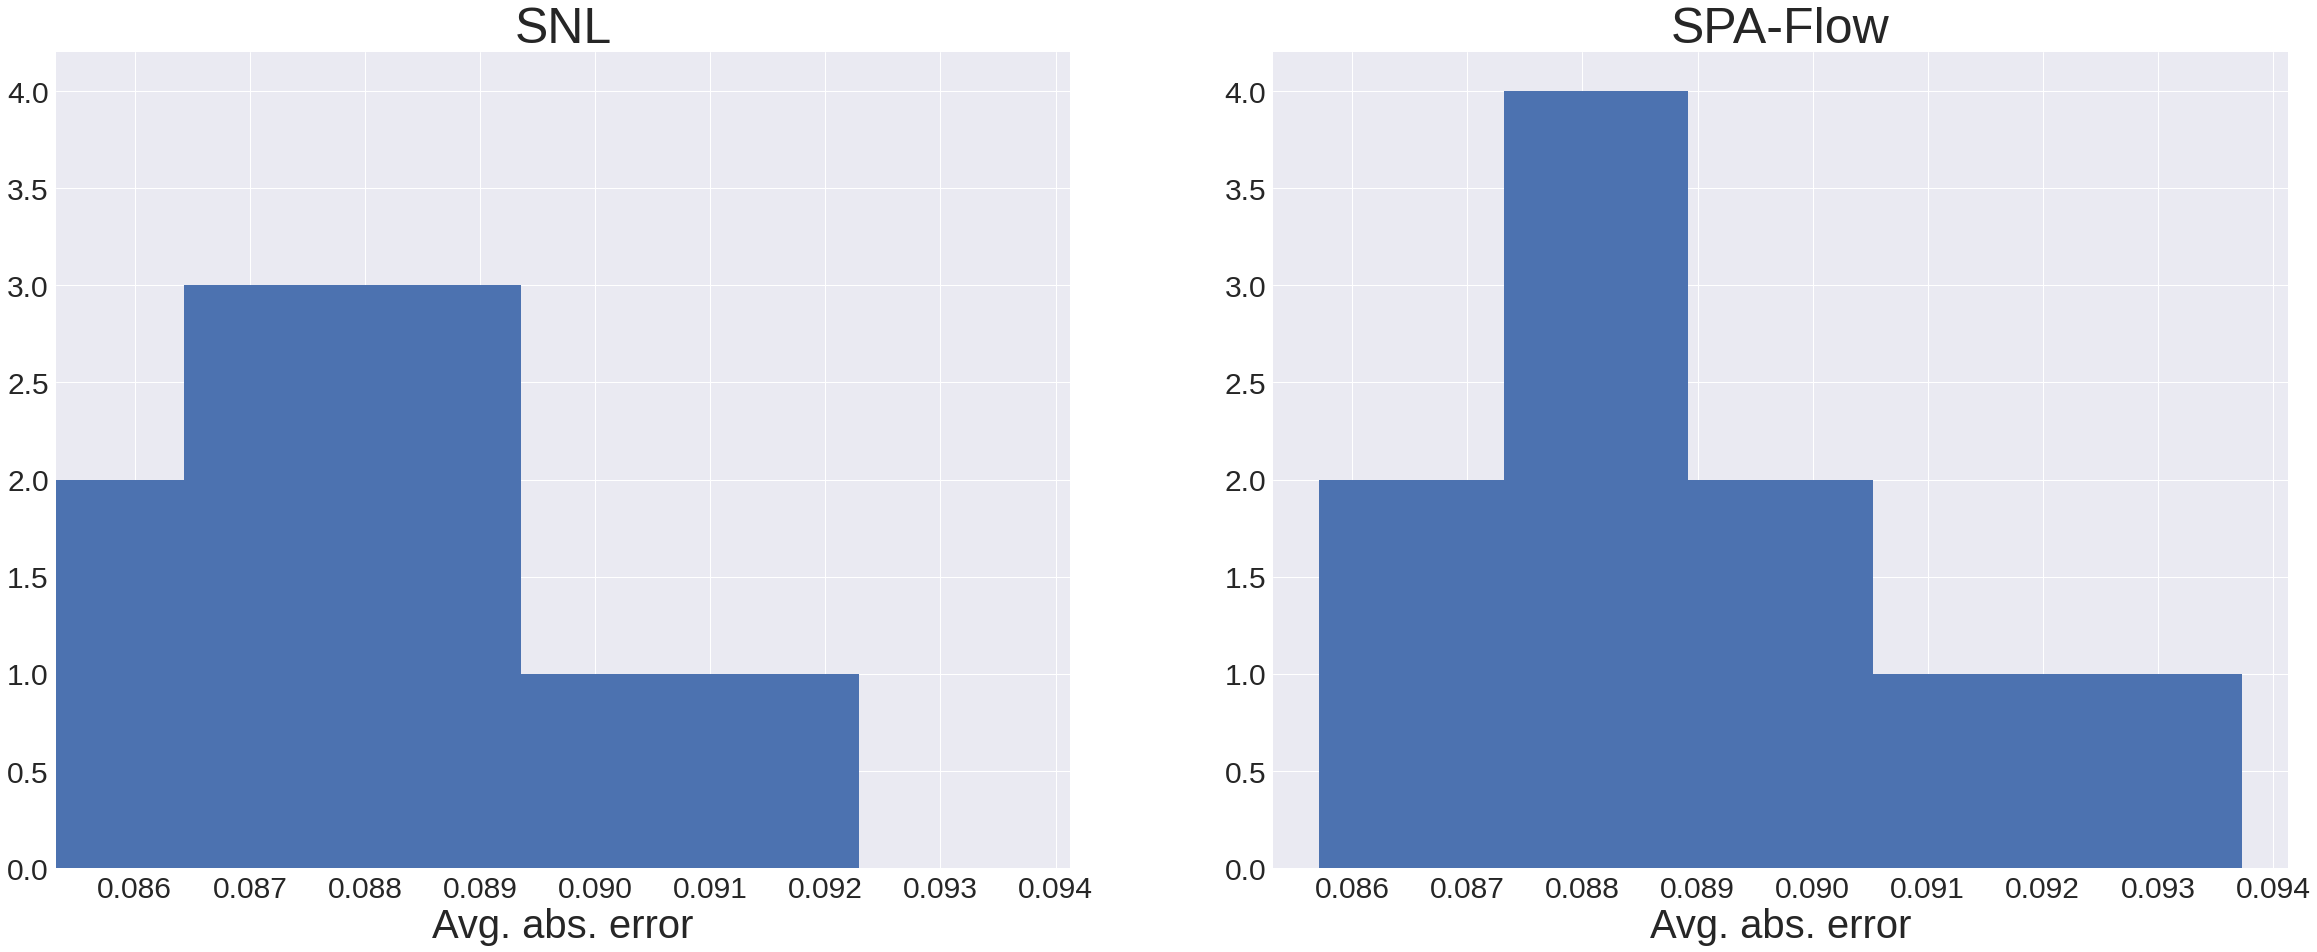

In [39]:
abs_error_per_data_set_spa_flow = [] 
abs_error_per_data_set_snl = [] 

# I am not sure if this makes a lot of sense since the inference is cond on S(x_o) not  the sampled data sets!
for i in range(seed_max):
    abs_error_per_data_set_spa_flow.append(abs(model_post[i] - spa_flow_lik_post[i]).mean()) # this is correct since we now have the case where calc the error for the summary stats that we cond on
    abs_error_per_data_set_snl.append(abs(model_post[i] - snl_lik_post[i]).mean()) # should be snl_lik
    
fig = plt.figure(figsize = (40,15))

ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)

ax1.hist(abs_error_per_data_set_spa_flow,5)
ax1.set_title("SPA-Flow",fontsize=50)
ax1.set_xlabel("Avg. abs. error",fontsize=40)

ax2.hist(abs_error_per_data_set_snl,5)
ax2.set_title("SNL",fontsize=50)
ax2.set_xlabel("Avg. abs. error",fontsize=40)

ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())


ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='minor', labelsize=25)

print("Mean abs error (Flow): "  + str(np.array(abs_error_per_data_set_flow).mean().round(4)))
print("Mean abs error (SPA): "  + str(np.array(abs_error_per_data_set_spa).mean().round(4)))